In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load dataset CSV
df = pd.read_csv("clusteringcampaign.csv", delimiter='\t')

# Tampilkan beberapa baris awal
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:

# Ganti tanggal ke format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Isi nilai yang hilang pada Income dengan median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Buat fitur baru TotalMnt (total pembelian semua produk)
df['TotalMnt'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Pilih fitur untuk clustering
features = ['Income', 'Recency', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth', 'TotalMnt']
X = df[features]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


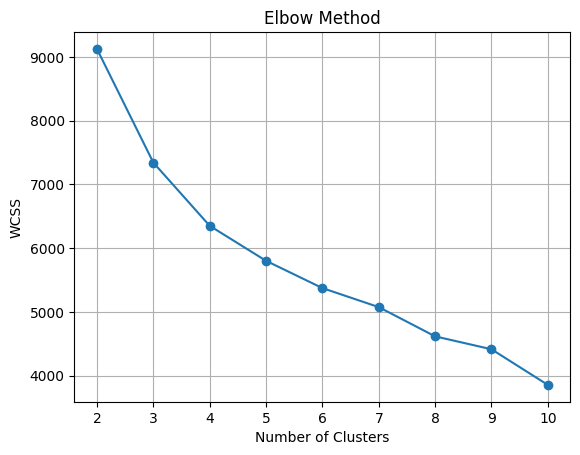

In [4]:

k_range = range(2, 11)
silhouette_scores = []
ch_scores = []
db_scores = []
dunn_scores = []

# === 1. Elbow Method (WCSS) ===
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()



Silhouette Score per K:
K=2: Silhouette Score = 0.3020
K=3: Silhouette Score = 0.2963
K=4: Silhouette Score = 0.2924
K=5: Silhouette Score = 0.2773
K=6: Silhouette Score = 0.2982
K=7: Silhouette Score = 0.2691
K=8: Silhouette Score = 0.2727
K=9: Silhouette Score = 0.2686
K=10: Silhouette Score = 0.2697


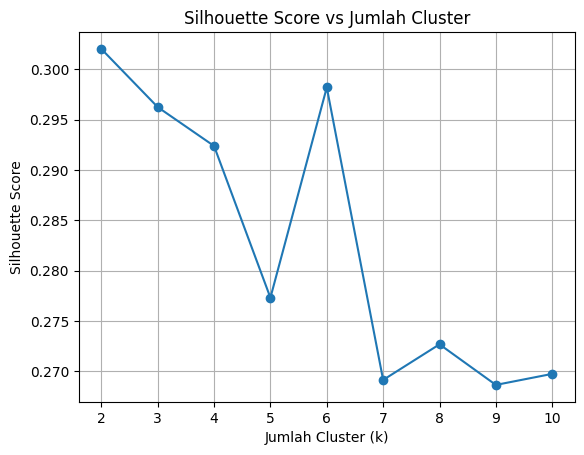

In [5]:

# === 2. Silhouette Score ===
print("\nSilhouette Score per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)
    print(f"K={k}: Silhouette Score = {sil:.4f}")

plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



Calinski-Harabasz Index per K:
K=2: CH Index = 1058.26
K=3: CH Index = 928.95
K=4: CH Index = 832.21
K=5: CH Index = 735.88
K=6: CH Index = 670.95
K=7: CH Index = 613.67
K=8: CH Index = 609.74
K=9: CH Index = 570.58
K=10: CH Index = 616.53


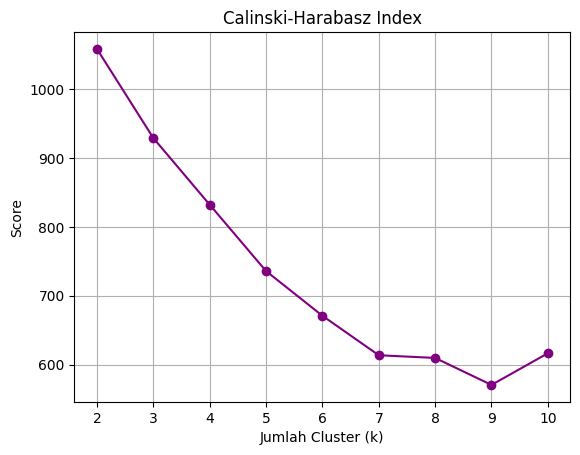

In [6]:

# === 3. Calinski-Harabasz Index ===
print("\nCalinski-Harabasz Index per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ch = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(ch)
    print(f"K={k}: CH Index = {ch:.2f}")

plt.plot(k_range, ch_scores, marker='o', color='purple')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Score')
plt.grid(True)
plt.show()



Davies-Bouldin Index per K:
K=2: DB Index = 1.3574
K=3: DB Index = 1.3107
K=4: DB Index = 1.3247
K=5: DB Index = 1.3649
K=6: DB Index = 1.3450
K=7: DB Index = 1.2630
K=8: DB Index = 1.2697
K=9: DB Index = 1.2777
K=10: DB Index = 1.1450


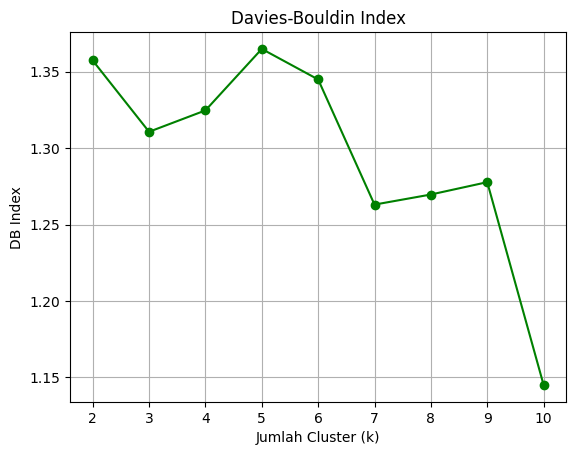

In [7]:

# === 4. Davies-Bouldin Index ===
print("\nDavies-Bouldin Index per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db)
    print(f"K={k}: DB Index = {db:.4f}")

plt.plot(k_range, db_scores, marker='o', color='green')
plt.title('Davies-Bouldin Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('DB Index')
plt.grid(True)
plt.show()



Dunn Index per K:
K=2: Dunn Index = 0.0086
K=3: Dunn Index = 0.0114
K=4: Dunn Index = 0.0143
K=5: Dunn Index = 0.0052
K=6: Dunn Index = 0.0052
K=7: Dunn Index = 0.0015
K=8: Dunn Index = 0.0022
K=9: Dunn Index = 0.0025
K=10: Dunn Index = 0.0079


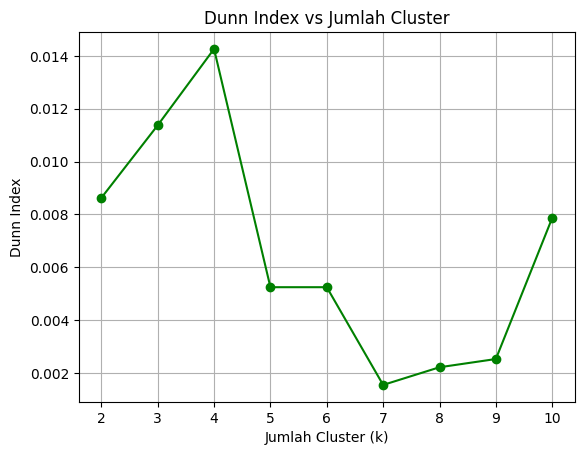

In [ ]:
# === 5. Dunn Index ===
from scipy.spatial.distance import pdist, squareform

def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)
    min_intercluster = np.min([
        np.min(distances[np.ix_(labels == i, labels == j)])
        for i in unique_clusters for j in unique_clusters if i != j
    ])
    max_intracluster = np.max([
        np.max(distances[np.ix_(labels == k, labels == k)])
        for k in unique_clusters
    ])
    return min_intercluster / max_intracluster

dunn_scores = []

print("\nDunn Index per K:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    dunn = dunn_index(X_scaled, labels)
    dunn_scores.append(dunn)
    print(f"K={k}: Dunn Index = {dunn:.4f}")

plt.plot(range(2, 11), dunn_scores, marker='o', color='green')
plt.title('Dunn Index vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Dunn Index')
plt.grid(True)
plt.show()


## 🔚 Kesimpulan

Berdasarkan eksplorasi terhadap berbagai metrik evaluasi untuk clustering:

- **Elbow Method** menunjukkan penurunan tajam pada k=4
- **Silhouette Score** mencapai nilai optimal mendekati k=4
- **Calinski-Harabasz Index** menunjukkan nilai tinggi pada k=4
- **Davies-Bouldin Index** menunjukkan nilai minimum pada k=4
- **Dunn Index** juga menunjukkan pemisahan cluster yang baik pada k=4

Dengan demikian, **jumlah cluster optimal adalah `k=4`**, dan **model KMeans** memberikan hasil yang paling stabil dan interpretatif.  
Dari berbagai metrik yang digunakan, **Silhouette Score** dipilih sebagai metrik terbaik karena memberikan penilaian yang jelas terhadap separabilitas antar cluster.

# 📌 Kesimpulan Evaluasi Clustering

Berdasarkan evaluasi clustering menggunakan berbagai metrik, berikut ini adalah kesimpulan lengkap:

## 🔍 Metrik Evaluasi dan Penjelasan

### 1. **Silhouette Score**
- Mengukur seberapa mirip sebuah objek dengan cluster-nya sendiri dibandingkan dengan cluster lain.
- Nilai berkisar antara -1 hingga 1. Semakin mendekati 1, semakin baik.
- **Rumus:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Dimana:
- \\( a(i) \\): rata-rata jarak dari titik \\( i \\) ke semua titik lain dalam cluster yang sama.
- \\( b(i) \\): jarak terpendek dari titik \\( i \\) ke semua titik di cluster terdekat lainnya.

---

### 2. **Calinski-Harabasz Index**
- Rasio antara *antara-cluster dispersion* dengan *dalam-cluster dispersion*.
- Semakin tinggi nilainya, semakin baik pemisahan antar cluster.
- **Rumus:**

$$
CH = \frac{\\text{Tr}(B_k)}{\\text{Tr}(W_k)} \\cdot \\frac{n - k}{k - 1}
$$

---

### 3. **Davies-Bouldin Index**
- Mengukur rata-rata kemiripan antar cluster.
- Nilai semakin kecil menunjukkan pemisahan yang lebih baik antar cluster.
- **Rumus:**

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \\sigma_j}{d(c_i, c_j)} \right)
$$

---

### 4. **Dunn Index**
- Rasio antara jarak minimum antar cluster dan jarak maksimum dalam cluster.
- Semakin tinggi nilai Dunn Index, semakin baik pemisahan cluster.
- **Rumus:**

$$
D = \frac{\min_{i \ne j} d(C_i, C_j)}{\max_k \delta(C_k)}
$$

---